<a href="https://colab.research.google.com/github/Harika-Mullaguri/Deep-Learning/blob/main/GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import gradio as gr
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import gradio as gr

In [4]:
text = """
Once upon a time in a land far away, there was a little village surrounded by lush green forests.
The villagers lived in harmony with nature, cherishing the beauty around them.
"""

In [5]:
# Step 1: Preprocessing the text--NLP
tokenizer = Tokenizer(char_level=True)  # Tokenize at the character level
tokenizer.fit_on_texts(text)
char_index = tokenizer.word_index
index_char = tokenizer.index_word
vocab_size = len(char_index) + 1

In [6]:
sequences = tokenizer.texts_to_sequences(text)

In [7]:
sequences = [item for sublist in sequences for item in sublist]

In [8]:
seq_length = 40
X, y = [], []
for i in range(len(sequences) - seq_length):
    X.append(sequences[i:i + seq_length])
    y.append(sequences[i + seq_length])

X = np.array(X)
y = to_categorical(y, num_classes=vocab_size)


In [9]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=50, input_length=seq_length),
    GRU(150, return_sequences=False),
    Dense(vocab_size, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
history=model.fit(X, y, epochs=100, batch_size=64)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.0764 - loss: 3.2562
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.1506 - loss: 3.2370
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.1486 - loss: 3.2163
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.1311 - loss: 3.1874
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.1486 - loss: 3.1384
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.1447 - loss: 3.0386
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.1311 - loss: 3.0344
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.1701 - loss: 2.9347
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.1350 - loss: 2.9830
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.1506 - loss: 2.9417
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.1564 - loss: 2.8827
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.1467 - l

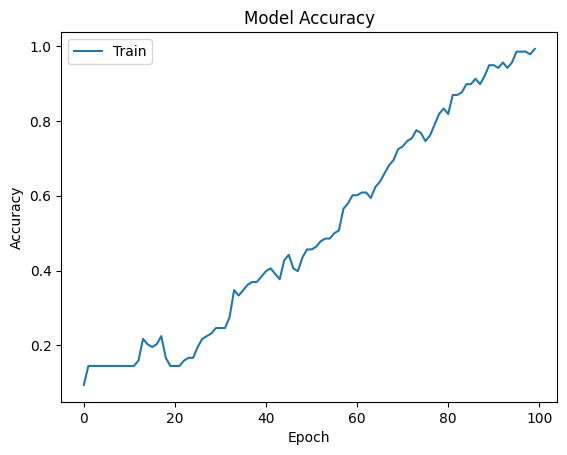

In [12]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [11]:
def generate_text(seed_text, num_chars):
    for _ in range(num_chars):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=seq_length, truncating='pre')
        predicted_probs = model.predict(token_list, verbose=0)
        predicted_char_index = np.argmax(predicted_probs)
        predicted_char = index_char[predicted_char_index]
        seed_text += predicted_char
    return seed_text

In [12]:
def gradio_generate(seed_text, num_chars):
    return generate_text(seed_text, int(num_chars))

interface = gr.Interface(
    fn=gradio_generate,
    inputs=[
        gr.Textbox(label="Seed Text", placeholder="Enter seed text, e.g., 'Once upon a time'"),
        gr.Slider(minimum=50, maximum=500, step=10, value=200, label="Number of Characters")
    ],
    outputs=gr.Textbox(label="Generated Text"),
    title="GRU-Based Text Generator",
    description="Enter a seed text and specify the number of characters to generate new text using a GRU-based neural network."
)

# Launch the Gradio app
interface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://86eb79df70caaa71d2.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
